In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load the dataset
uber = pd.read_csv('D:/Belajar/Data Analysis/Dataset/uber-raw-data-apr14.csv')

In [3]:
# Display the head of dataset
uber.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [4]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  564516 non-null  object 
 1   Lat        564516 non-null  float64
 2   Lon        564516 non-null  float64
 3   Base       564516 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


In [5]:
# Check if there are any missing values

def num_missing(x):
    return sum(x.isnull())
print('Number of missing/null values per column')
print(uber.apply(num_missing, axis=0))

Number of missing/null values per column
Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64


In [6]:
uber.isna().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [7]:
# Extact additional information

uber['Date/Time'] = pd.to_datetime(uber['Date/Time'], format='%m/%d/%Y %H:%M:%S')
uber['DayofWeekNum'] = uber['Date/Time'].dt.dayofweek
uber['DayOfWeek'] = uber['Date/Time'].dt.day_name()
uber['DayNum'] = uber['Date/Time'].dt.day
uber['HourOfDay'] = uber['Date/Time'].dt.hour

In [8]:
# Display the head of the dataset

uber.head()

,Date/Time,Lat,Lon,Base,DayofWeekNum,DayOfWeek,DayNum,HourOfDay
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,Tuesday,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,Tuesday,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,Tuesday,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,Tuesday,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,Tuesday,1,0


In [9]:
# Display the shape
uber.shape

(564516, 8)

In [10]:
# Unique base codes

uber['Base'].unique()

array(['B02512', 'B02598', 'B02617', 'B02682', 'B02764'], dtype=object)

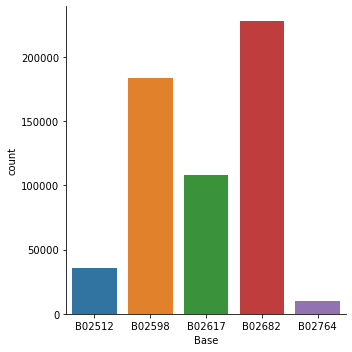

In [11]:
sns.catplot(x='Base', data=uber, kind='count')

In [12]:
uber_week_data = uber.pivot_table(index=['DayofWeekNum','DayOfWeek'], values='Base', aggfunc='count')
uber_week_data

,,Base
DayofWeekNum,DayOfWeek,
0,Monday,60861
1,Tuesday,91185
2,Wednesday,108631
3,Thursday,85067
4,Friday,90303
5,Saturday,77218
6,Sunday,51251


<AxesSubplot:xlabel='DayofWeekNum,DayOfWeek'>

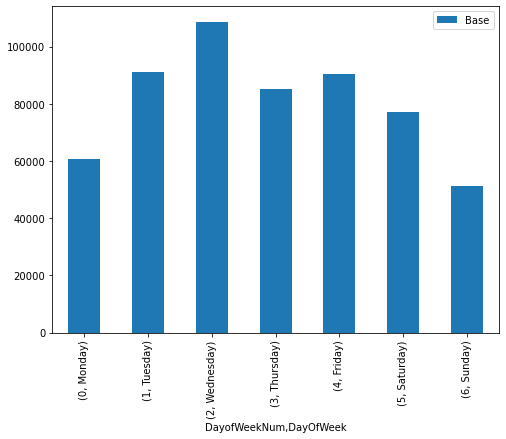

In [13]:
# Visualize the pivot table
uber_week_data.plot(kind='bar', figsize=(8,6))

<AxesSubplot:title={'center':'Hourly Journeys'}, xlabel='HourOfDay'>

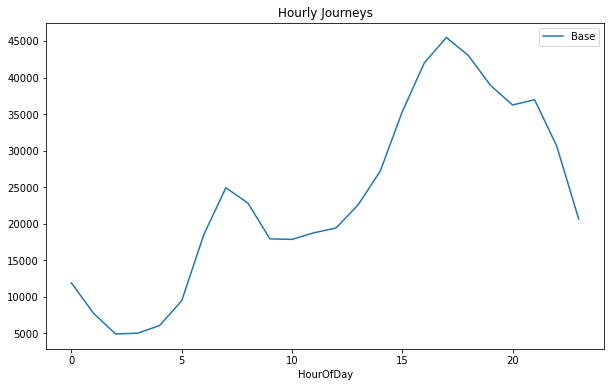

In [14]:
uber_hourly_data = uber.pivot_table(index=['HourOfDay'], values='Base', aggfunc='count')
uber_hourly_data.plot(kind='line', figsize=(10,6), title='Hourly Journeys')

In [ ]:
uber_day_data = uber.pivot_table(index=['DayNum'], values='Base', aggfunc='count')
uber_day_data = uber.plot(kind='bar', figsize=(10,5), title='Journey by DayNum')

In [ ]:
def count_rows(rows):
    return len(rows)

by_date = uber.groupby('DayNum').apply(count_rows)
by_date

In [ ]:
print('tes')